Это не окончательные наши визуализации. Мы продолжим с ними рабоать. С большой вероятностью будем что-то чистить, уберём выбросы, поправим данные, чтобы они лучше подходили выбранной модели, покрасим всё в один цвет по фэншую, завернём в подарочную упаковку и так далее. 

In [105]:
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv('df_result.csv')

In [107]:
df

,id,number of rooms,price(rub),metro,time(min),total area(м²),year of completion,living area(м²),kitchen area(м²),ceiling height(м),type of house,WC,apartment floor,total floors,readiness,num of elevators,type of elevators
0,283969757,1,16042265,Савёловская,13,32.20,2025,36.2,18.1,3.0,Монолитный,1,4,22,Без отделки,1,пассажирский
1,284037342,1,16297308,Технопарк,17,43.50,2024,36.2,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский
2,266826884,1,17086799,Дмитровская,8,32.10,2025,11.2,13.4,3.0,Монолитный,1,11,36,Чистовая,3,пассажирский
3,284807290,1,18669730,Преображенская площадь,5,46.59,2024,36.2,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский
4,264958724,1,19015154,Марьина роща,8,43.45,2024,36.2,18.1,3.0,Монолитный,1,38,55,Предчистовая,4,пассажирский
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,284759598,2,10000000,Солнцево,10,54.20,2023,28.2,16.2,3.1,Монолитный,1,7,24,Без отделки,1,пассажирский
1481,284593318,2,11000000,Ольховая,20,52.50,2022,25.4,11.7,2.7,Монолитный,1,7,15,Чистовая,1,пассажирский
1482,283555890,1,7591477,Саларьево,19,32.17,2024,10.8,9.7,2.8,Монолитный,1,4,18,Без отделки,1,пассажирский
1483,284961268,1,9220000,Ольховая,9,40.50,2022,18.9,18.1,2.8,Панельный,1,8,14,Чистовая,1,пассажирский


В дальнейших своих действиях мы хотим понять, что именно влияет на формирование цены и в какой стемени, для этого построим гистограммы и функции плотности распределения. А также визуализации помогут нам понять, есть ли выбросы и избавиться в последующим, чтобы наша модель была более четкой и точной.

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#улучшим качество изображений
%config InlineBackend.figure_format = 'retina'

In [109]:
import matplotlib.ticker as ticker

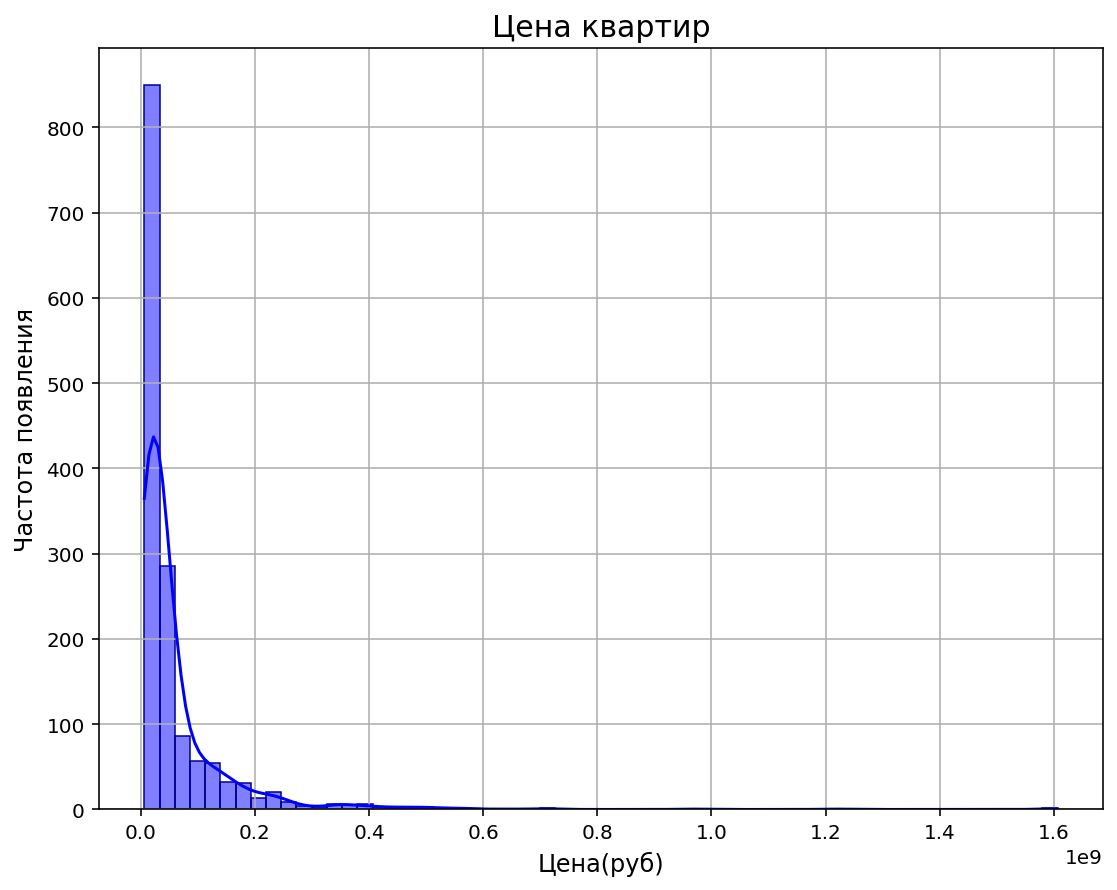

In [110]:
fig, axes = plt.subplots(figsize=(9, 7))

axes.set_title("Цена квартир", fontsize=15)
axes.set_xlabel("Цена(руб)", fontsize=12)
axes.set_ylabel("Частота появления", fontsize=12)
sns.histplot(df['price(rub)'], bins=60, color='blue', edgecolor='darkblue', kde= True, ax=axes)


plt.grid(axis='x', which='major')
plt.grid(axis='y', which='major')

**Влиянение метро**

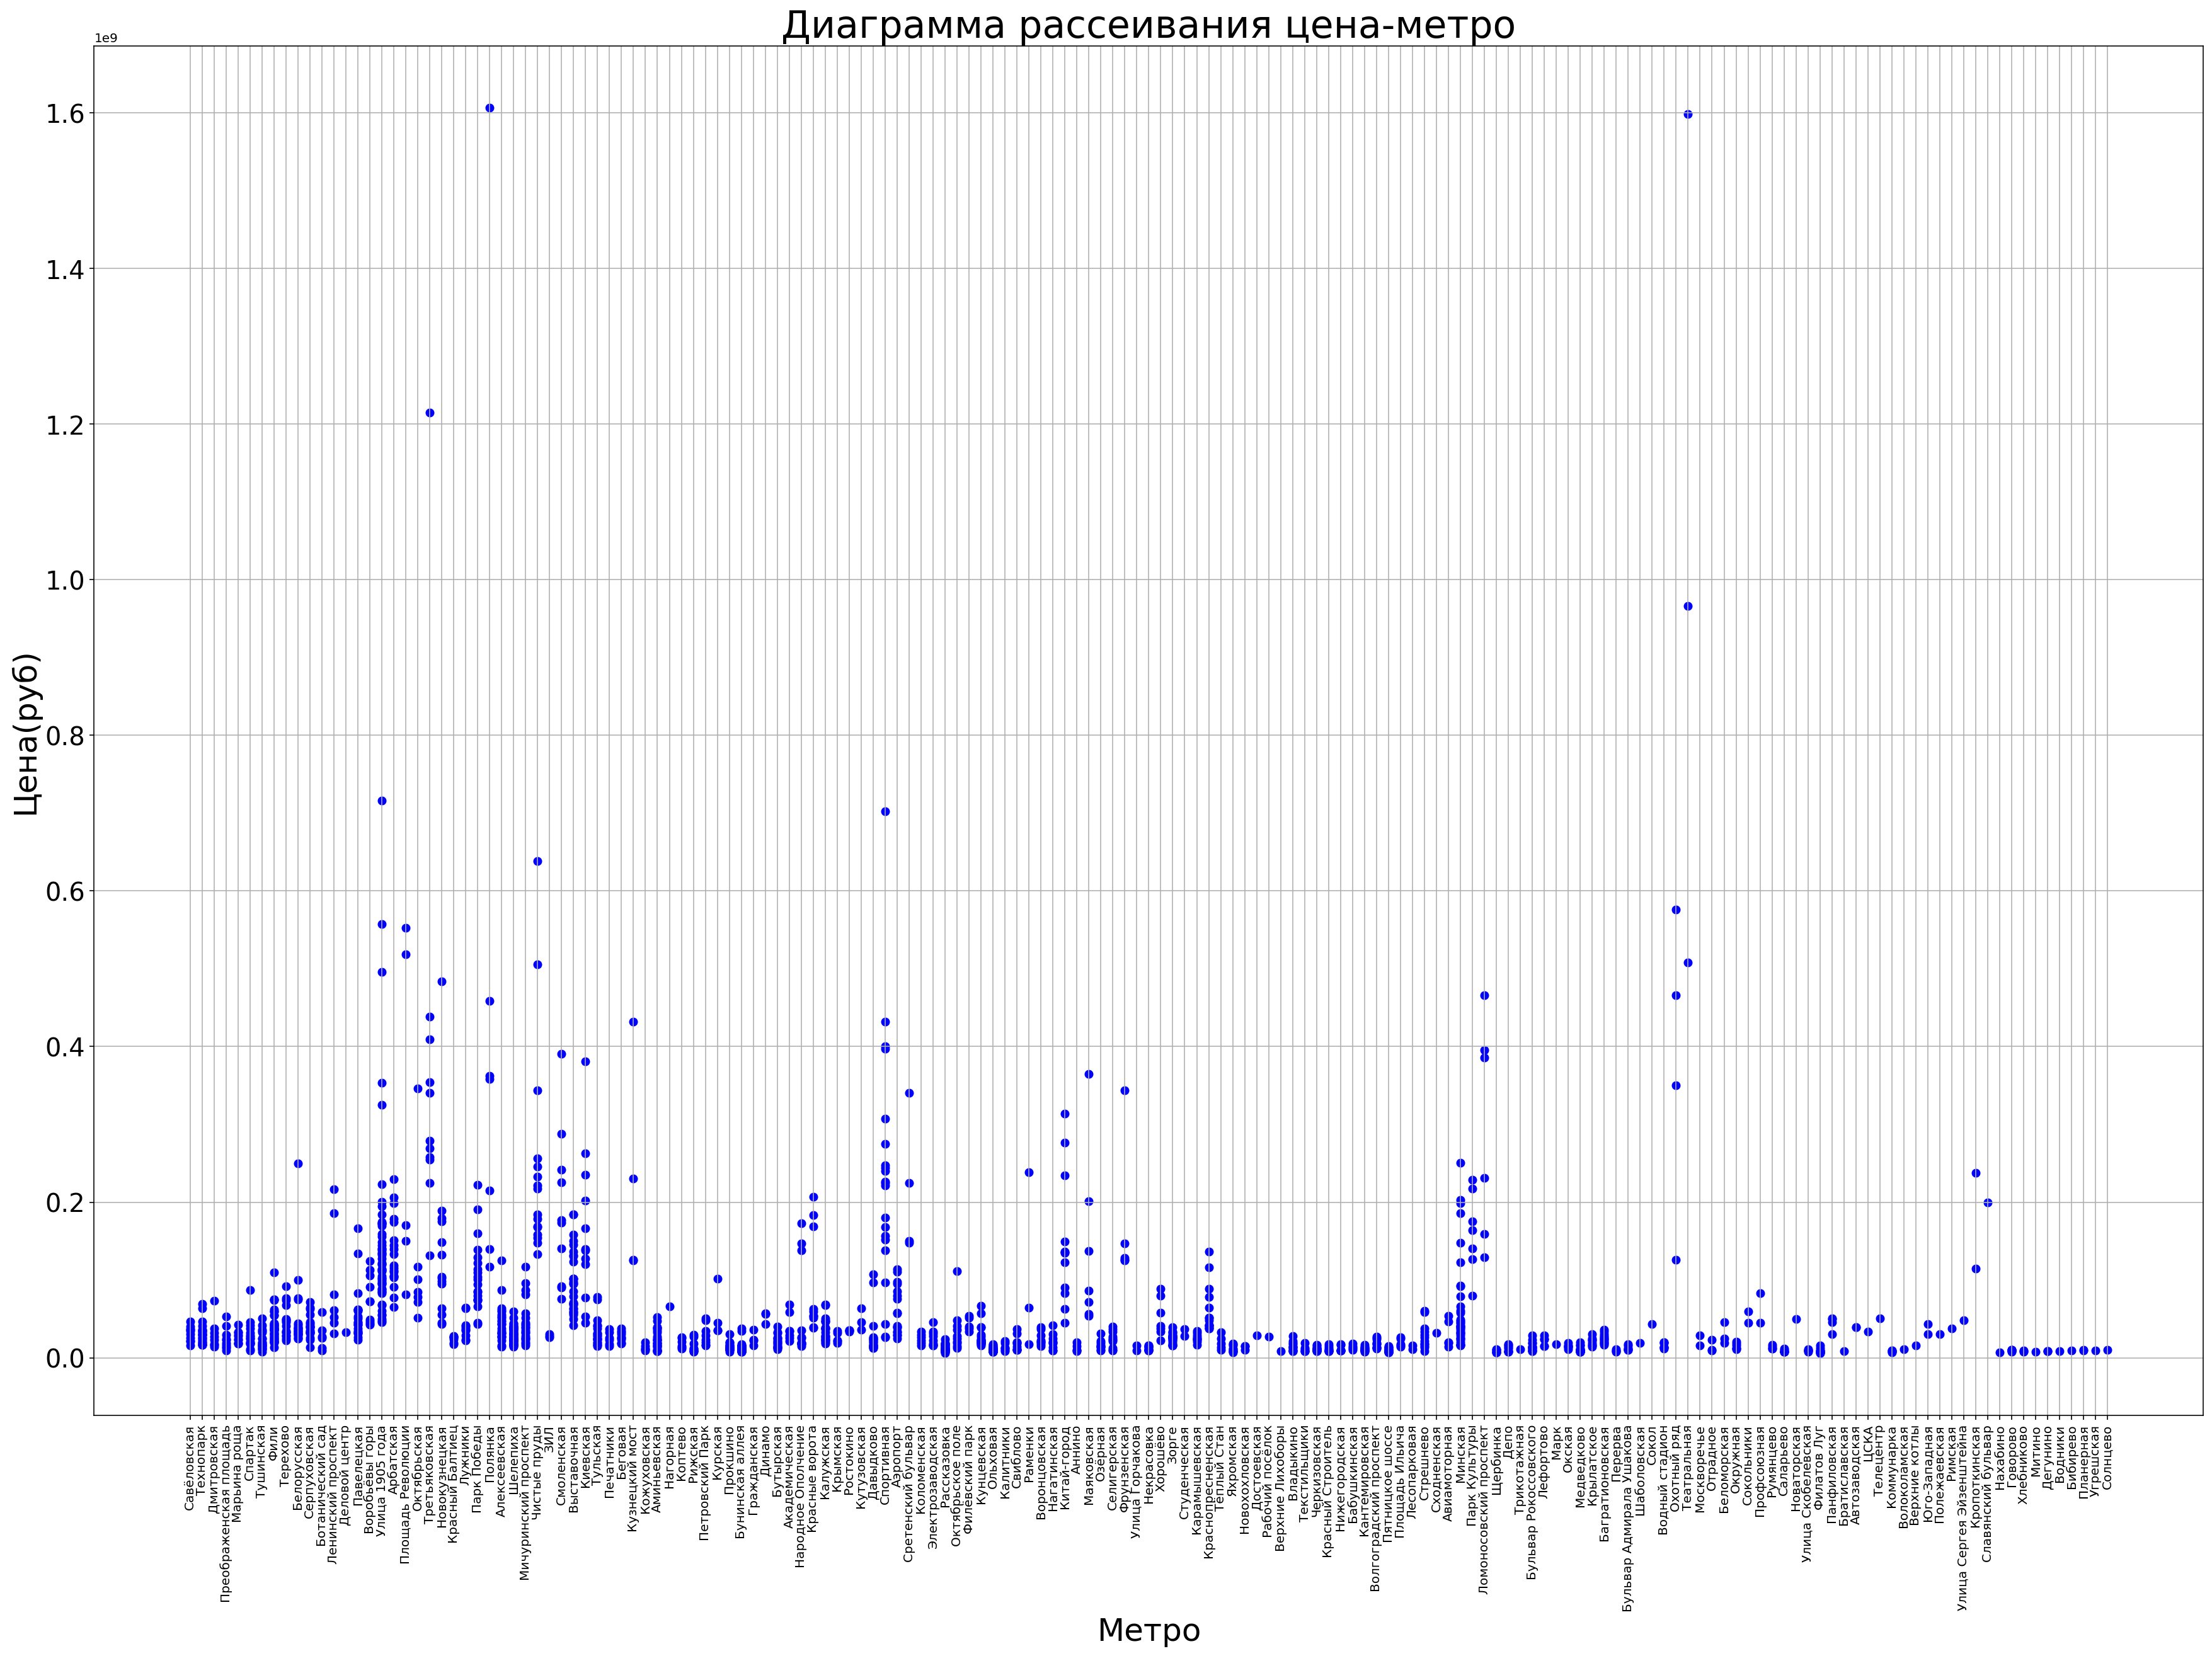

In [111]:
import matplotlib.ticker as ticker

plt.figure(figsize=(30, 20))
plt.title('Диаграмма рассеивания цена-метро', fontsize=30)
plt.xlabel('Метро', fontsize=25)
plt.ylabel('Цена(руб)', fontsize=25)
plt.scatter(x=df.metro, y=df['price(rub)'], color='blue')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=20)
#https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
# def price_format(y, pos):         
#     return '%1.0f' % (y * 1e-7)

# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_format))
plt.grid()

Исходя из полученного графика, можно сделать предположение, что между ценой квартиры и метро наблюдается взаимосвязь. Также, можно заметить некоторые сильно выше расположенные точки, это позволяет нам предположить, что на некоторых станциях цены значительно выше рынка.

При покупке квартиры очень важно ее расположение. Зачастую, покупатели рассматривают квартиры, которые находятся вблизи определенных станций метро. Рассмотрим распределение квартир по близлежащим к ним станциям место.

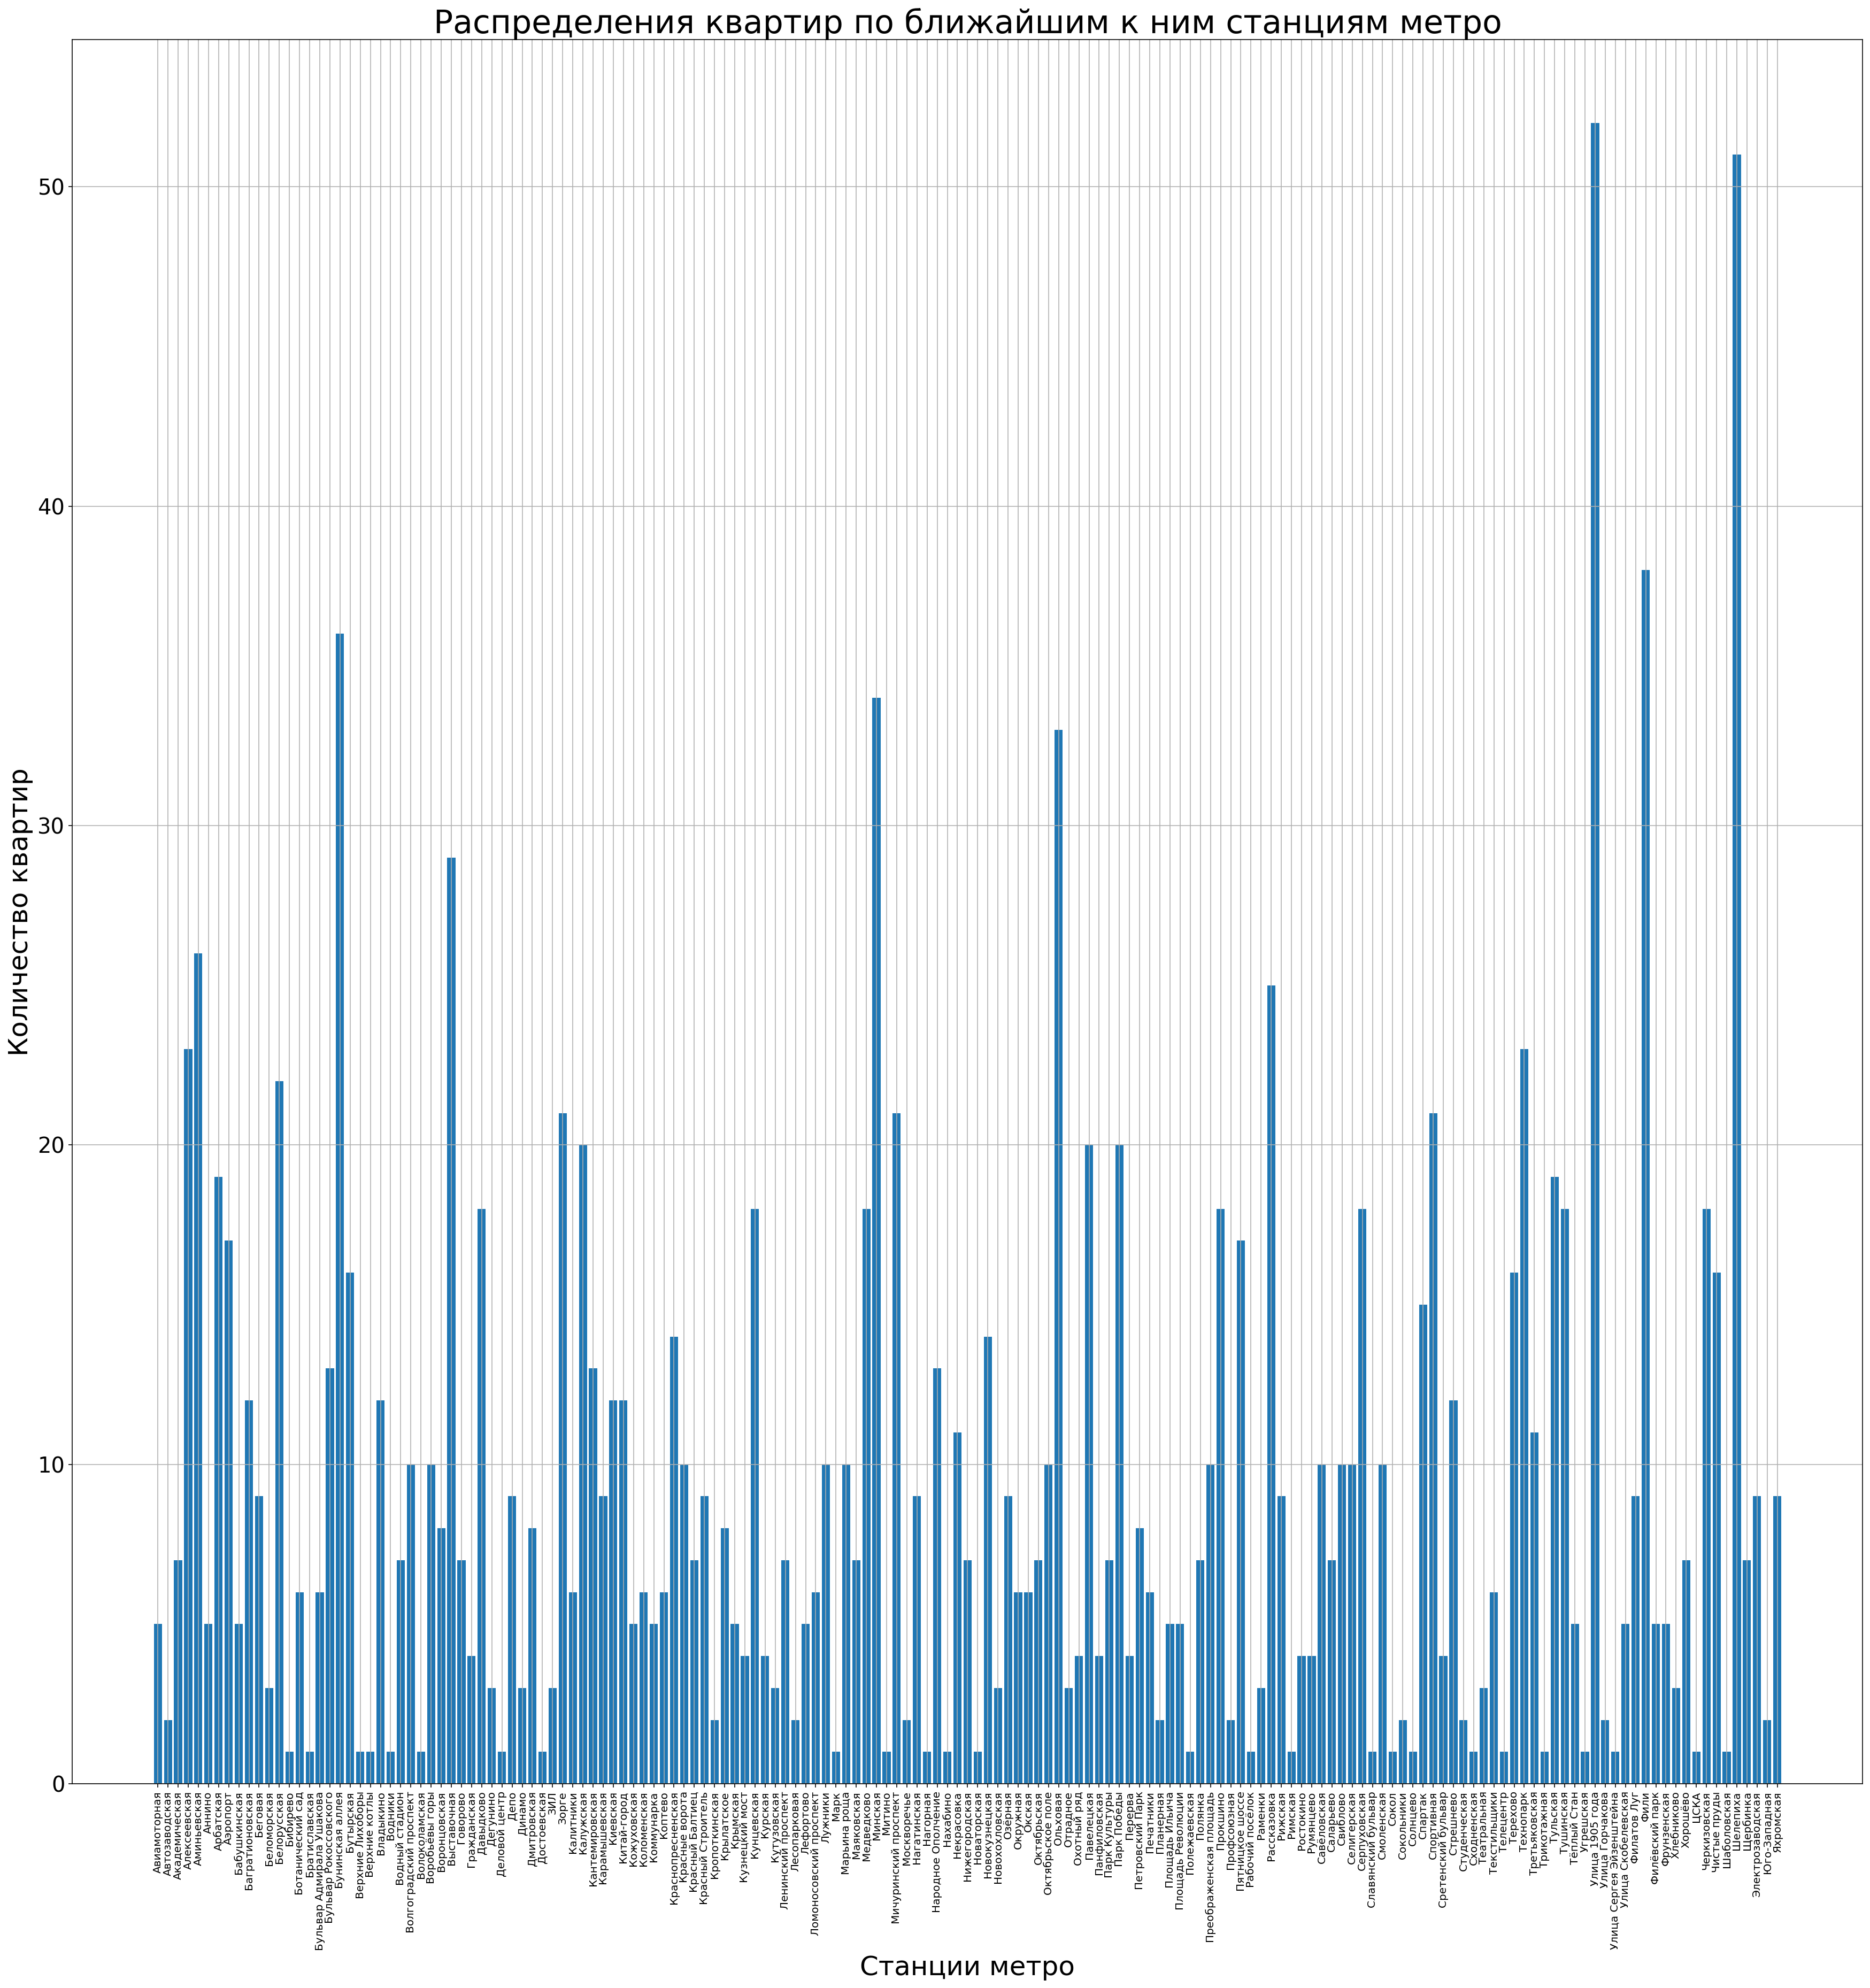

In [112]:
station_counts = df.groupby('metro')['id'].count()

plt.figure(figsize = (30, 30))
plt.title('Распределения квартир по ближайшим к ним станциям метро', fontsize=30)
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Станции метро', fontsize=25)
plt.ylabel('Количество квартир', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xticks(rotation = 90)

plt.grid()
plt.show()

Гистограмма показала, что наибольшее количество квартир, в соответствии с информацией из объявлений, находятся неподалеку от станций метро: Улица 1905 года и Шелепиха(50+ по каждому). Стоит отметить, что лидирующие станции метро, а также многие другие расположены в пределах МКАД, а покупателей подобное расположение обычно радует, так как это упращает их обыденные передвижения. Наименьшее количество квартир расположено вблизи таких станций метро, как: Бибирево, Братиславская, Верхние Лихоборы, Верхние котлы, Водники и тд. 

**Влияние количества комнат**

In [113]:
# plt.figure(figsize=(9, 7))

# plt.title('Диаграмма рассеивания цена-количество комнат', fontsize=15)
# plt.xlabel('Количество комнат', fontsize=12)
# plt.ylabel('Цена(млн руб)', fontsize=12)

# # def price_format(y, pos):
# #     return y

# def price_format(x, pos):
#     return f"{x} руб."

# plt.scatter(x=df['number of rooms'], y=df['price_mln'], color='blue')
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_format))

# plt.grid()
# plt.show()

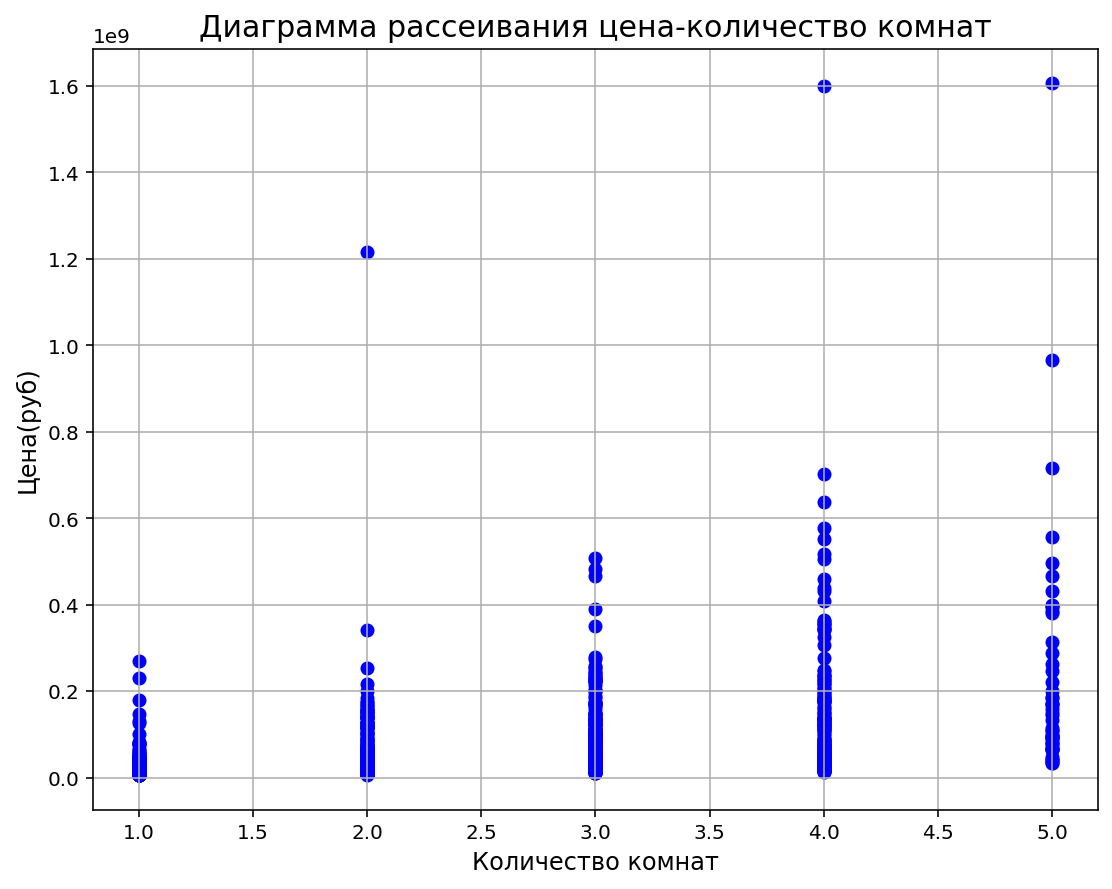

In [114]:
plt.figure(figsize = (9, 7))

plt.title('Диаграмма рассеивания цена-количество комнат', fontsize=15)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Цена(руб)', fontsize=12)
plt.scatter(x = df['number of rooms'], y = df['price(rub)'], color='blue')
plt.grid();

Исходя из этого графика, можно заметить, что с увеличением количества комнат, цена квартиры растет, что было вполне ожидаемо, так как вероятнее всего параллельно растет и метраж. Можно заметить, что выборка содержит выбросы в виде объектов со слишком высокой ценой, что может объясняться наличием других "выиграшных" признаков у той или иной квартиры.


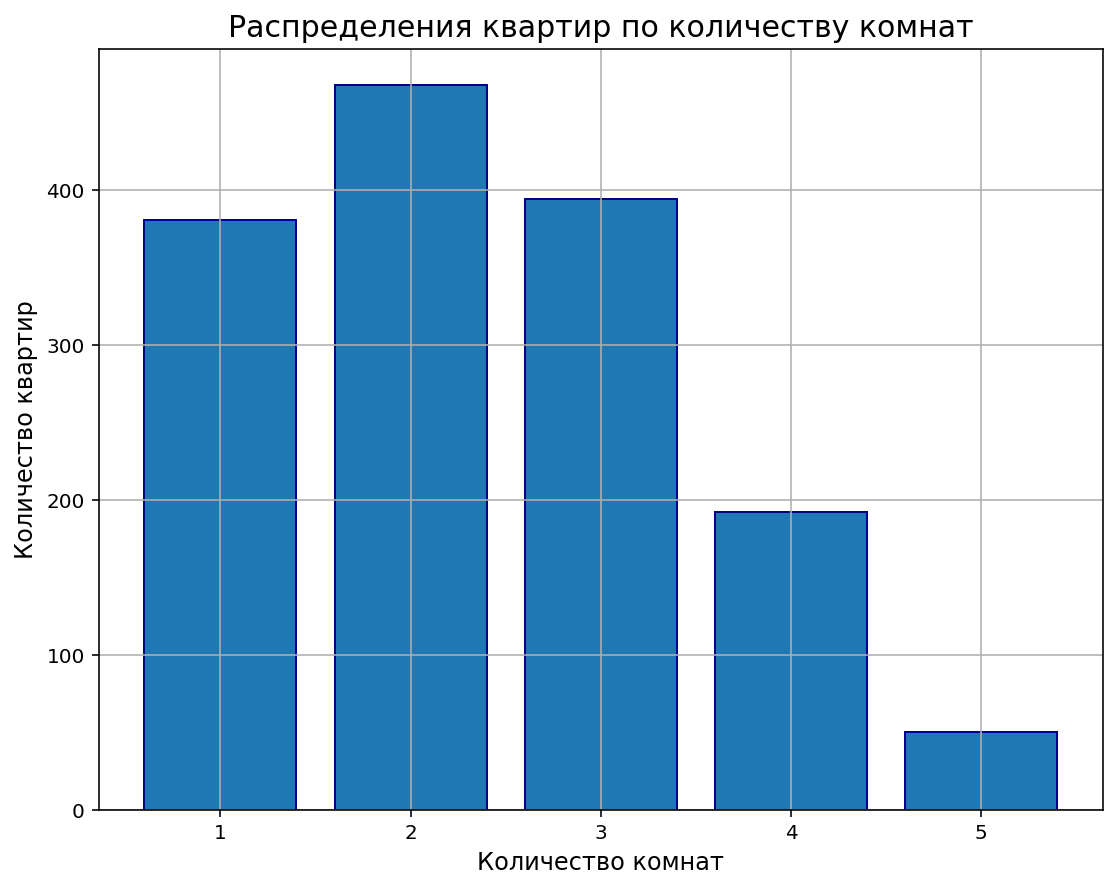

In [115]:
station_counts = df.groupby('number of rooms')['id'].count()

plt.figure(figsize = (9, 7))

plt.title('Распределения квартир по количеству комнат', fontsize=15)
plt.bar(station_counts.index, station_counts.values, edgecolor='darkblue')
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid()
plt.show()

Более 400 квартир имеют 2 комнаты, что вполне ожидаемо, так как в Москве очень высокие цены на недвижимость и зачастую люди ориентированы на покупку 2-х комнатных квартир, так как это самый оптимальный вариант для будущего комфортного жилья.

Давайте еще посмотрим на распределение цен на квартиры в зависимости от количества комнат. Попробуем это сделать с помощь диаграммы “ящик с усами”. 

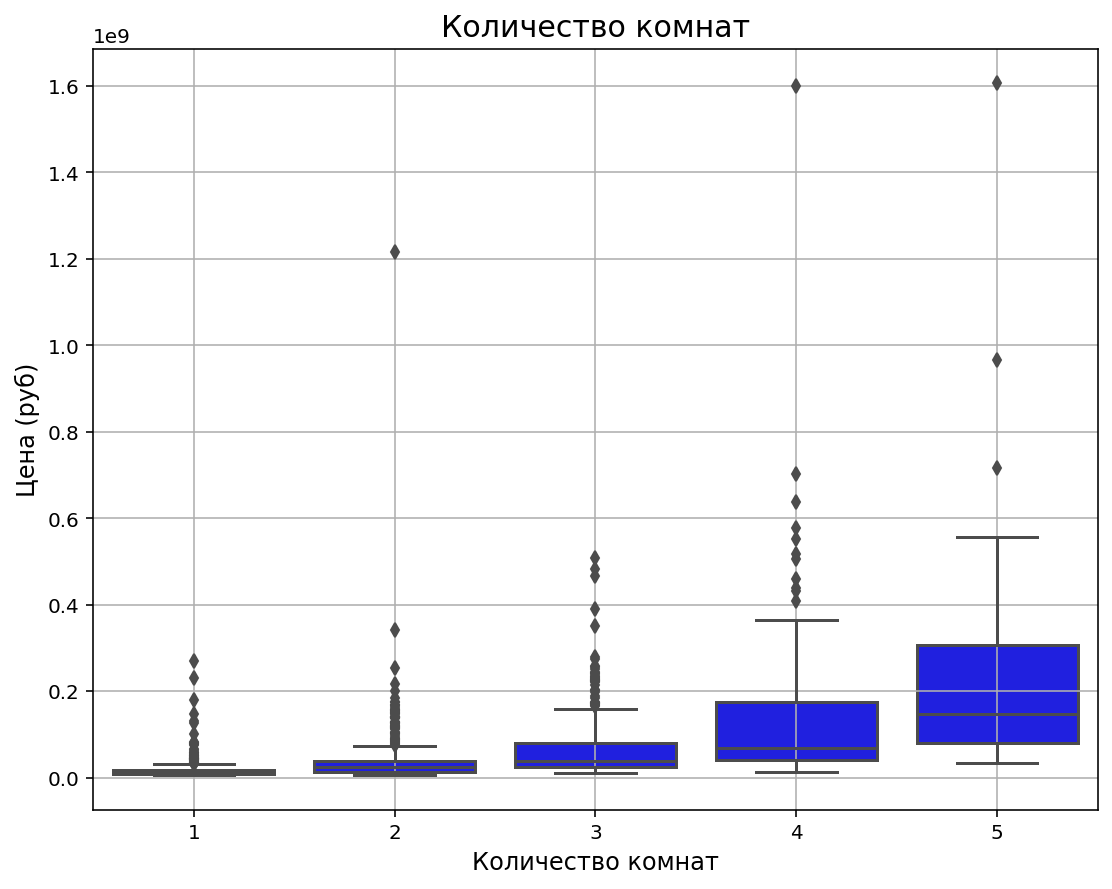

In [116]:
plt.figure(figsize = (9, 7))

plt.title('Количество комнат', fontsize=15)
sns.boxplot(data=df, x='number of rooms', y='price(rub)', color='blue')
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Цена (руб)', fontsize=12)

plt.grid()
plt.show()

Как мы и писали раннее, из графика следует, что цены растут с увеличением количества комнат, однако, можно заметить, что есть квартиры с меньшим количеством комнат, которые стоят больше чем средние значения квартир с большим числом комнат. Это может быть следствием влияния прочих факторов. Опять же, мы можем наблюдать выбросы, в последующем избавимся от них.



**Площадь**

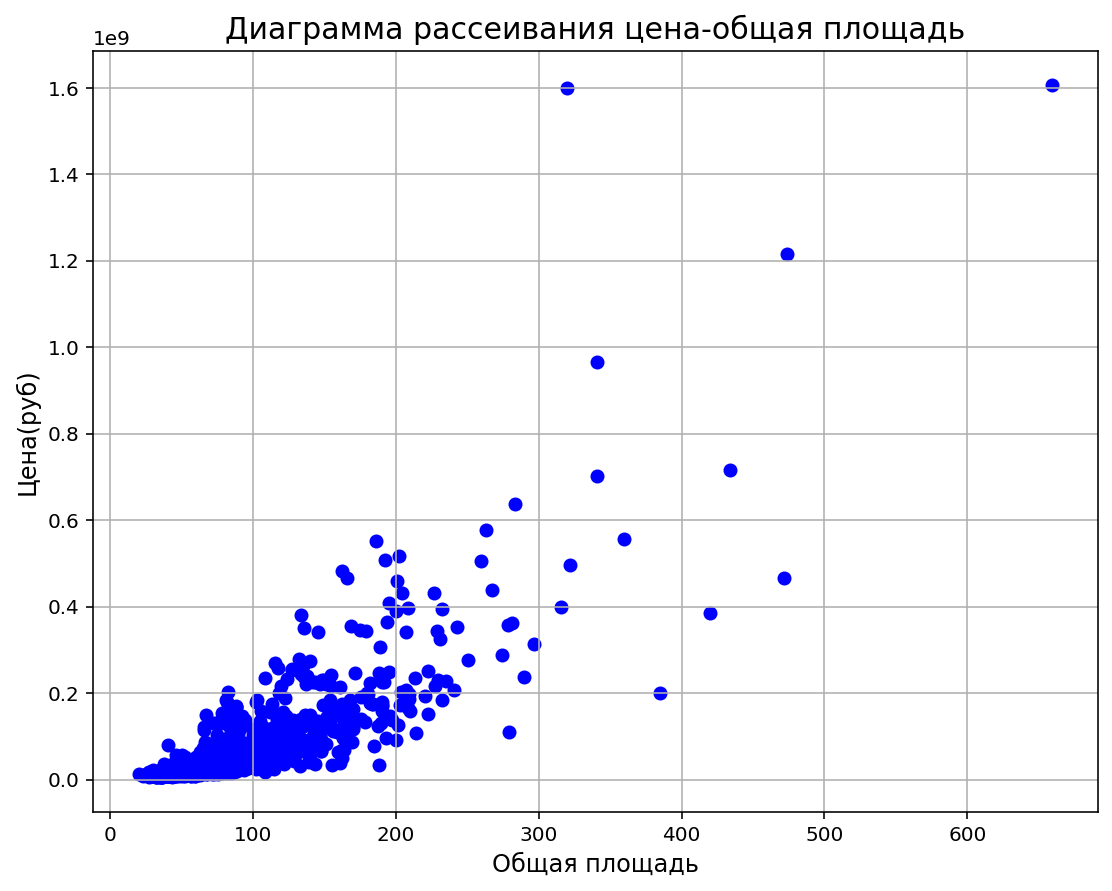

In [117]:
plt.figure(figsize = (9, 7))

plt.title('Диаграмма рассеивания цена-общая площадь', fontsize=15)
plt.xlabel('Общая площадь', fontsize=12)
plt.ylabel('Цена(руб)', fontsize=12)
plt.scatter(x = df['total area(м²)'], y = df['price(rub)'], color='blue')

plt.grid()
plt.show()

Можно заметить, что между ценой квартиры и общей площадью наблюдается положительная линейная взаимосвязь. Чем больше цена, тем выше потенциально может оказаться общая площадь квартиры. Следовательно, собранные нами данные не противоречат простой бытовой логике и принципам ценообразования для недвижимости)

Посмотрим на распределение частоты появления значений площади квартир

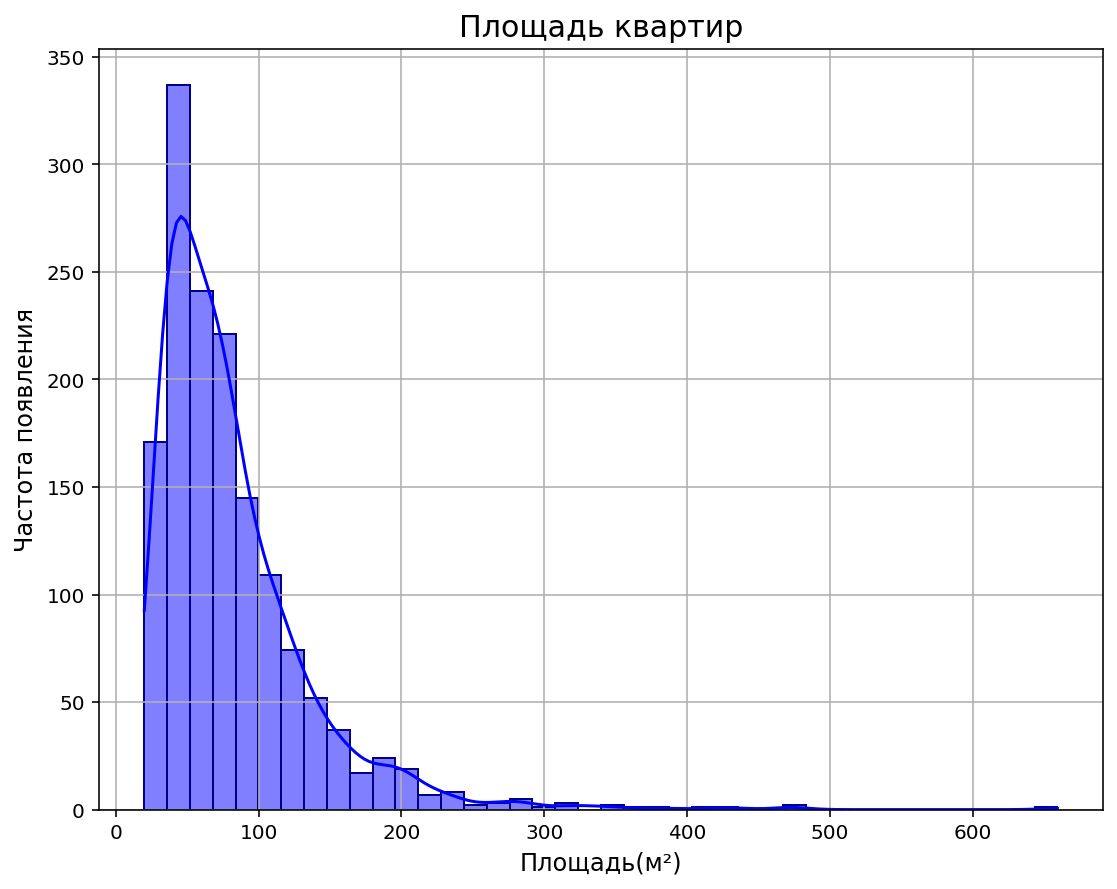

In [118]:
fig, axes = plt.subplots(figsize=(9, 7))

axes.set_title("Площадь квартир", fontsize=15)
axes.set_xlabel("Площадь(м²)", fontsize=12)
axes.set_ylabel("Частота появления", fontsize=12)
sns.histplot(df['total area(м²)'] ,bins=40, color='blue', edgecolor='darkblue', kde= True, ax=axes)
plt.grid(axis='x', which='major')
plt.grid(axis='y', which='major')


Насколько известно, общая площадь квартиры очень часто тесно коррелирует с площадью кухни (если это не студия, конечно), построим график 

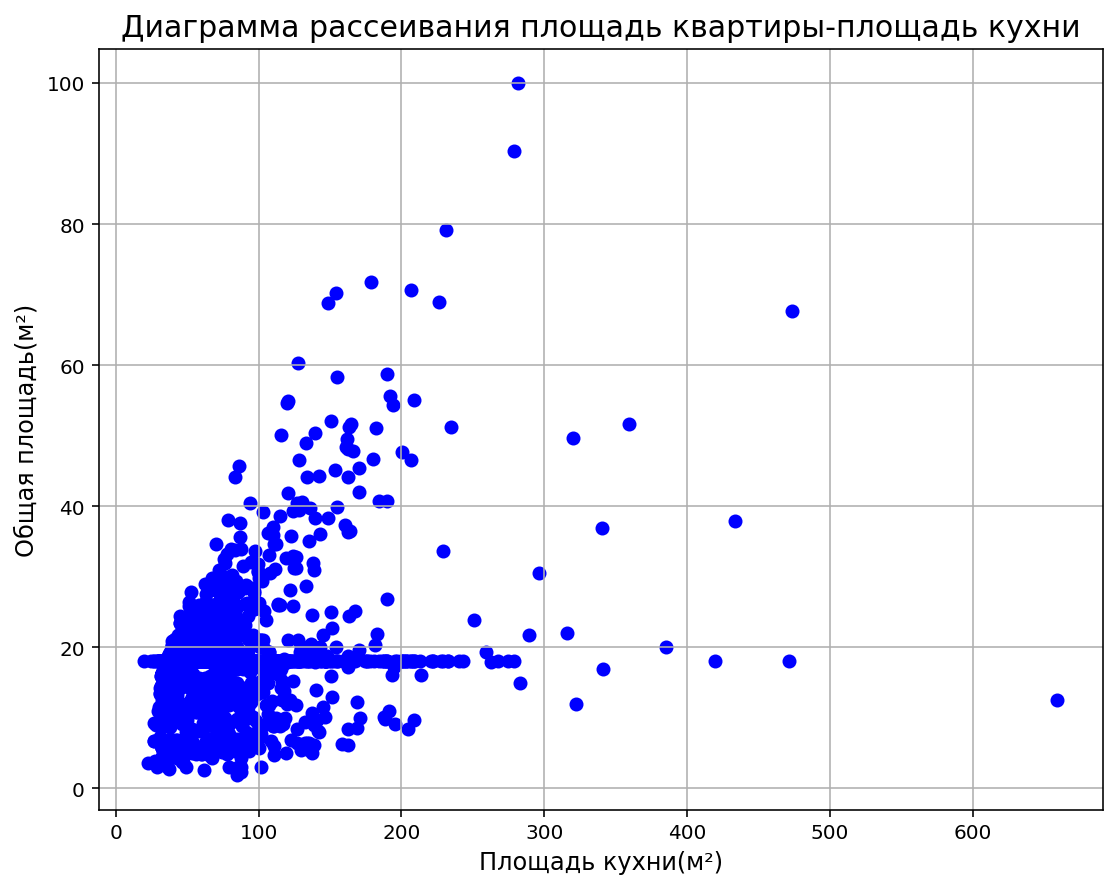

In [119]:
plt.figure(figsize = (9, 7))

plt.title('Диаграмма рассеивания площадь квартиры-площадь кухни', fontsize=15)
plt.xlabel('Площадь кухни(м²)', fontsize=12)
plt.ylabel('Общая площадь(м²)', fontsize=12)
plt.scatter(x = df['total area(м²)'], y = df['kitchen area(м²)'], color='blue')

plt.grid()
plt.show()

**Расстояние до метро**

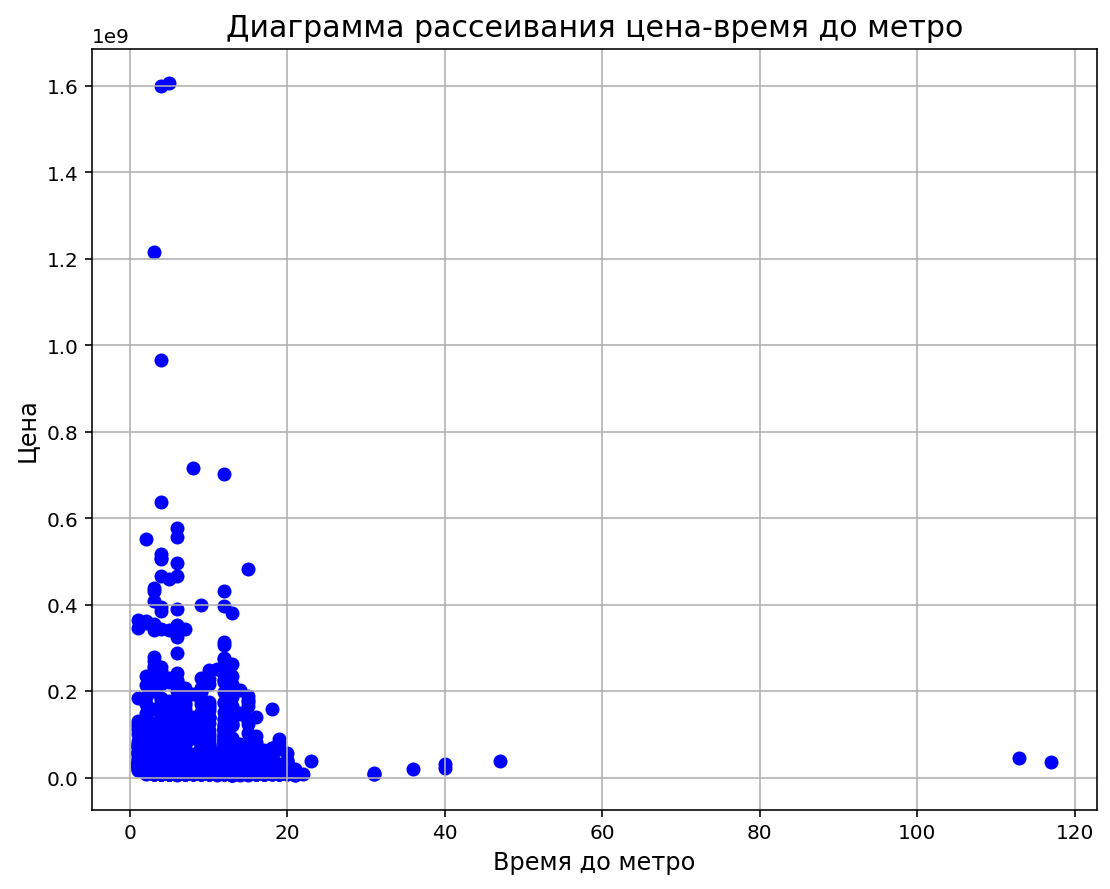

In [120]:
plt.figure(figsize = (9, 7))

plt.title('Диаграмма рассеивания цена-время до метро', fontsize=15)
plt.xlabel('Время до метро', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.scatter(x = df['time(min)'], y = df['price(rub)'], color='blue')

plt.grid()
plt.show()

Наблюдаем положительную линейную взаимосвязь между наблюдениями. По-хорошему, нужно бы поставить ограничение на ось ох, так как значений от 0 до 60 нам бы было более чем достаточно для хорошей картинки, но здесь мы анализируем данные на выбросы, поэтому оставим пока так. 

**Общее количество этажей**

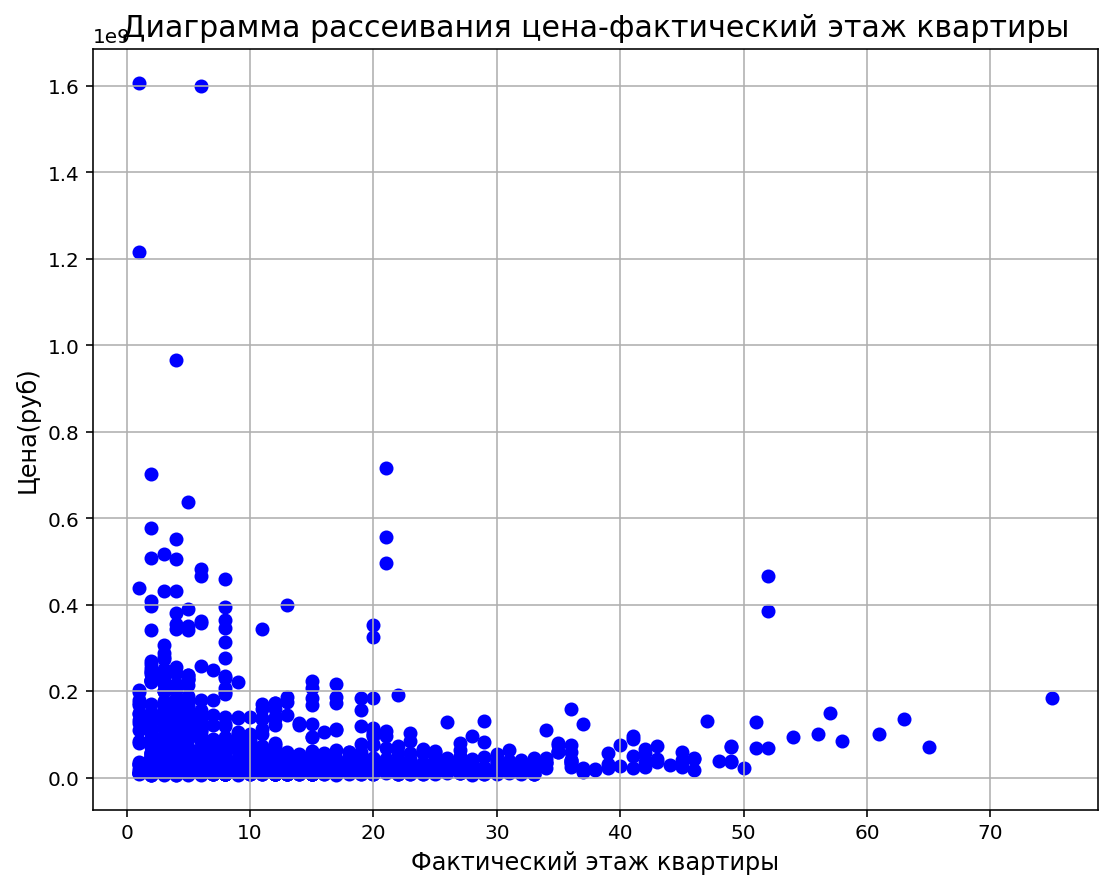

In [121]:
plt.figure(figsize = (9, 7))

plt.title('Диаграмма рассеивания цена-фактический этаж квартиры', fontsize=15)
plt.xlabel('Фактический этаж квартиры', fontsize=12)
plt.ylabel('Цена(руб)', fontsize=12)
plt.scatter(x = df['apartment floor'], y = df['price(rub)'], color='blue')

plt.grid()
plt.show()

Опять же, наблюдения демонстрируют положительную взаимосвязь, что вполне очевидно, так как зачастую покупатели хотят иметь хороший вид, и брать квартиру на более высоком этаже, нежели на первом с видом на двор(к примеру)

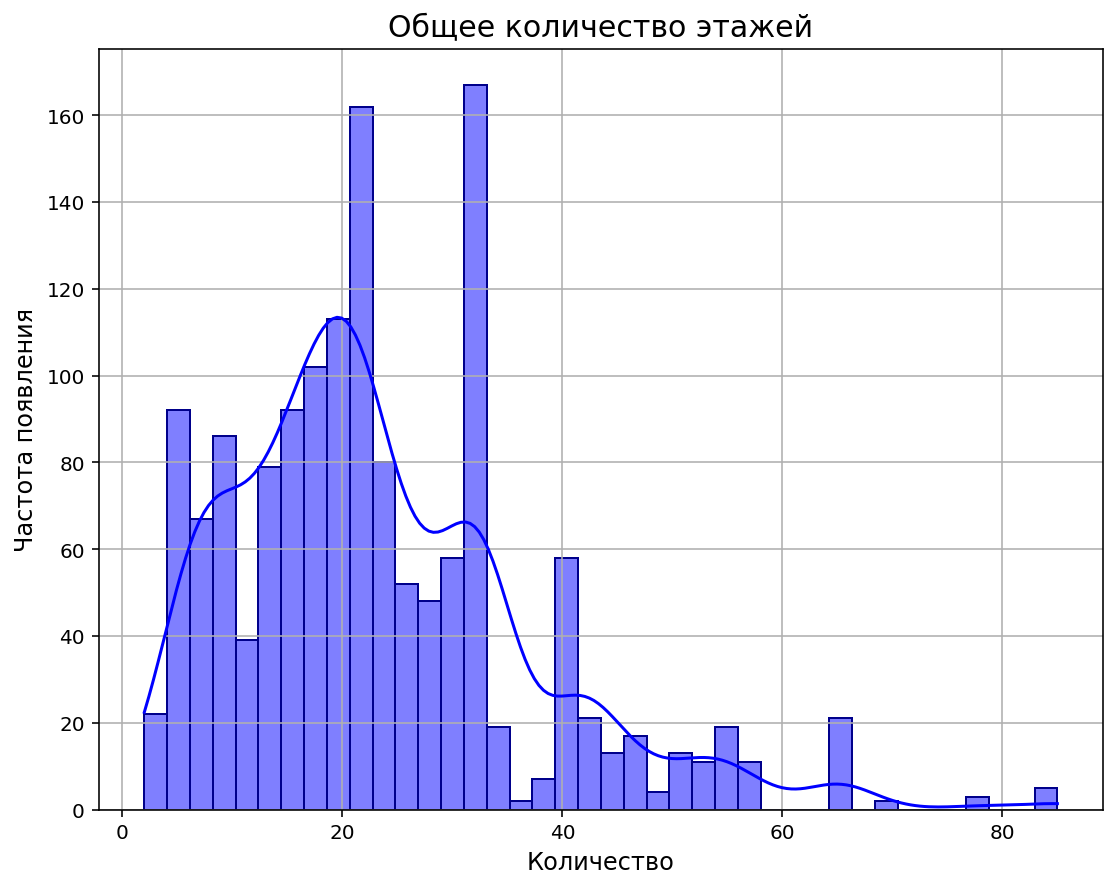

In [122]:
fig, axes = plt.subplots(figsize=(9, 7))

axes.set_title("Общее количество этажей", fontsize=15)
axes.set_xlabel("Количество", fontsize=12)
axes.set_ylabel("Частота появления", fontsize=12)
sns.histplot(df['total floors'] ,bins=40, color='blue', edgecolor='darkblue', kde= True, ax=axes)
plt.grid(axis='x', which='major')
plt.grid(axis='y', which='major')

В современном мире большинство новых жилых домов имеют более 20 этажей, что мы и можем увидеть на гистограме. Основная часть квартир находится в домах, где количество этажей от 3 до 33. Хотя это не предел, в некоторых жилых комплексов количество этажей достигает 80+.

**Год сдачи дома**

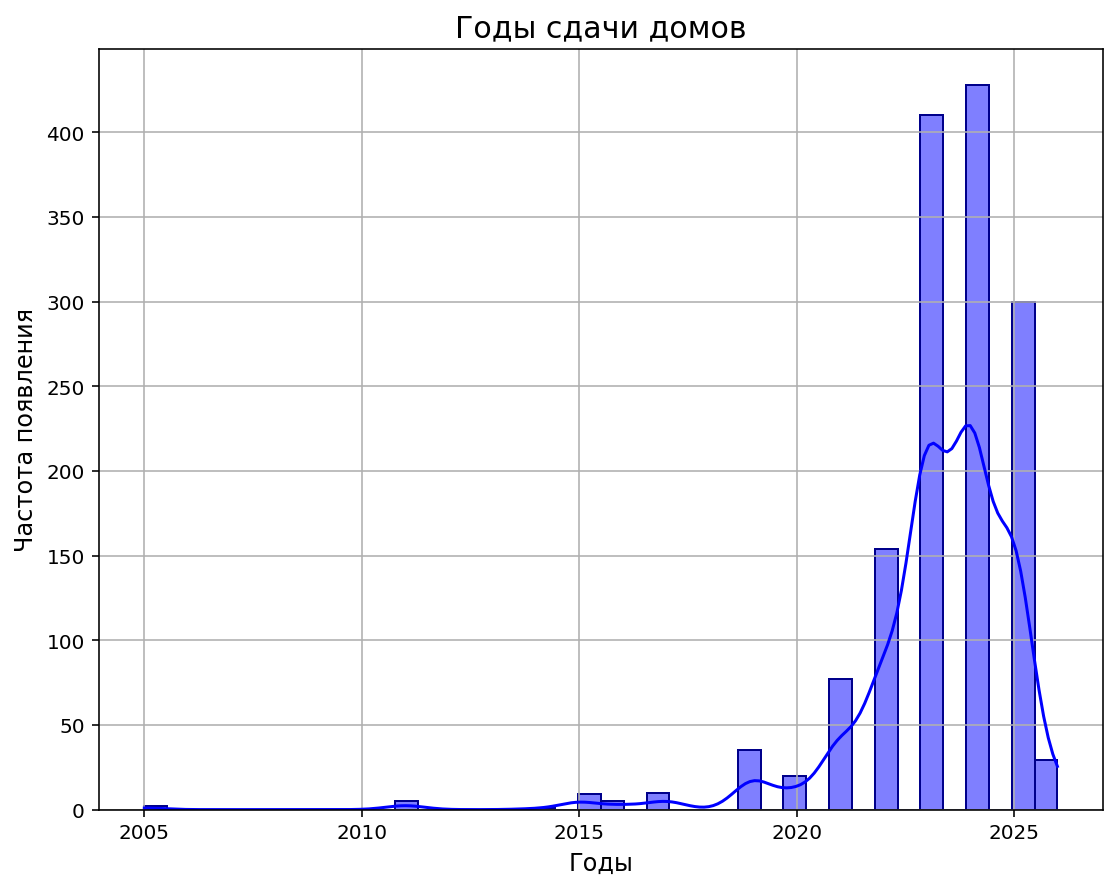

In [123]:
fig, axes = plt.subplots(figsize=(9, 7))

axes.set_title("Годы сдачи домов", fontsize=15)
axes.set_xlabel("Годы", fontsize=12)
axes.set_ylabel("Частота появления", fontsize=12)
sns.histplot(df['year of completion'] ,bins=40, color='blue', edgecolor='darkblue', kde= True, ax=axes)

plt.grid(axis='x', which='major')
plt.grid(axis='y', which='major')

Продолжая тему о современности построек, стоит отметить, что практически все квартиры находятся в домах, которые были сданы после 2020 года. А так как Москва очень активно застраивается, то более 400 домов будут сданы в 2023-2024 году, и 300 в 2025. Однако квартиры уже выставляются на продажу и пользуются высоким спросом, так как на этапе застройки жилых комплексов цена значительно ниже, нежели уже в запущенных. Менее 5 квартир находятся в домах 2005/2010 года сдачи.

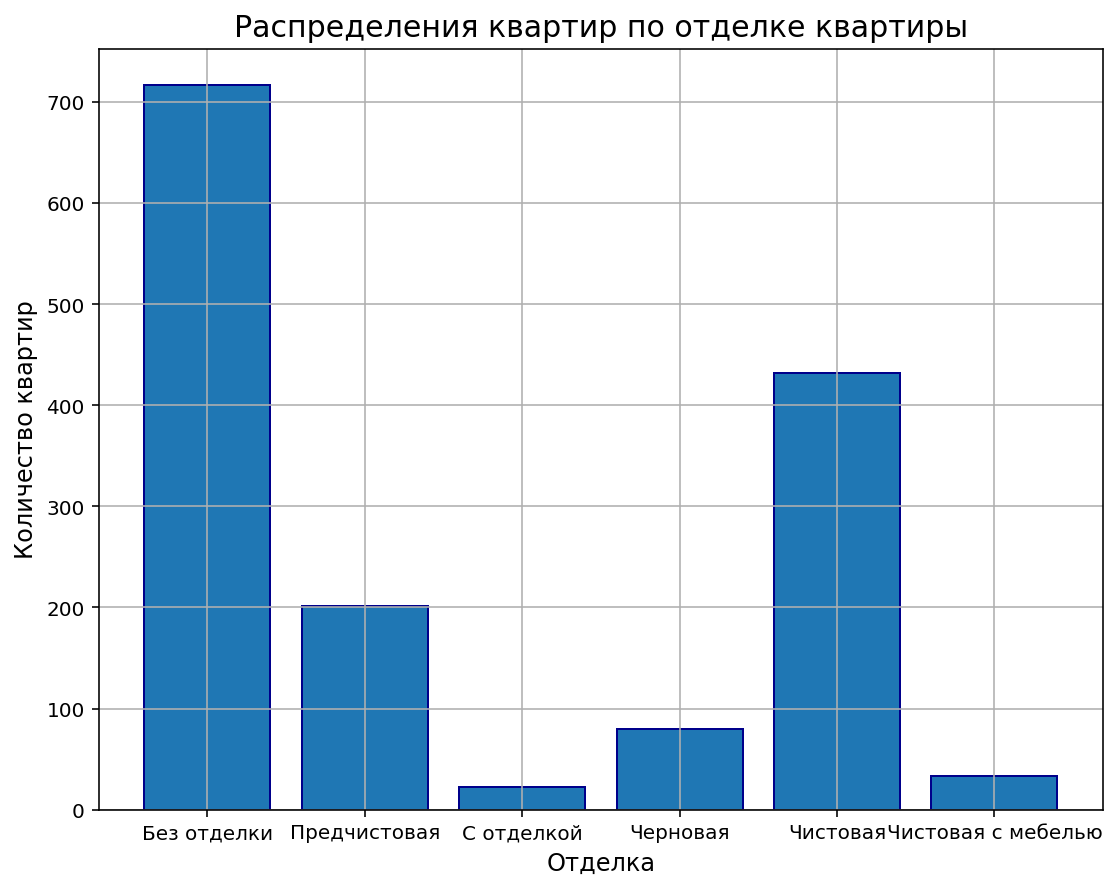

In [124]:
station_counts = df.groupby('readiness')['id'].count()

plt.figure(figsize = (9, 7))
plt.title('Распределения квартир по отделке квартиры', fontsize=15)
plt.bar(station_counts.index, station_counts.values, edgecolor='darkblue')
plt.xlabel('Отделка', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid()
plt.show()

Исходя из того, что писалось выше, о том что большинство домов еще не введены в эксплуатацию, вполне ожидаемо, что большая часть квартир еще без отделки.

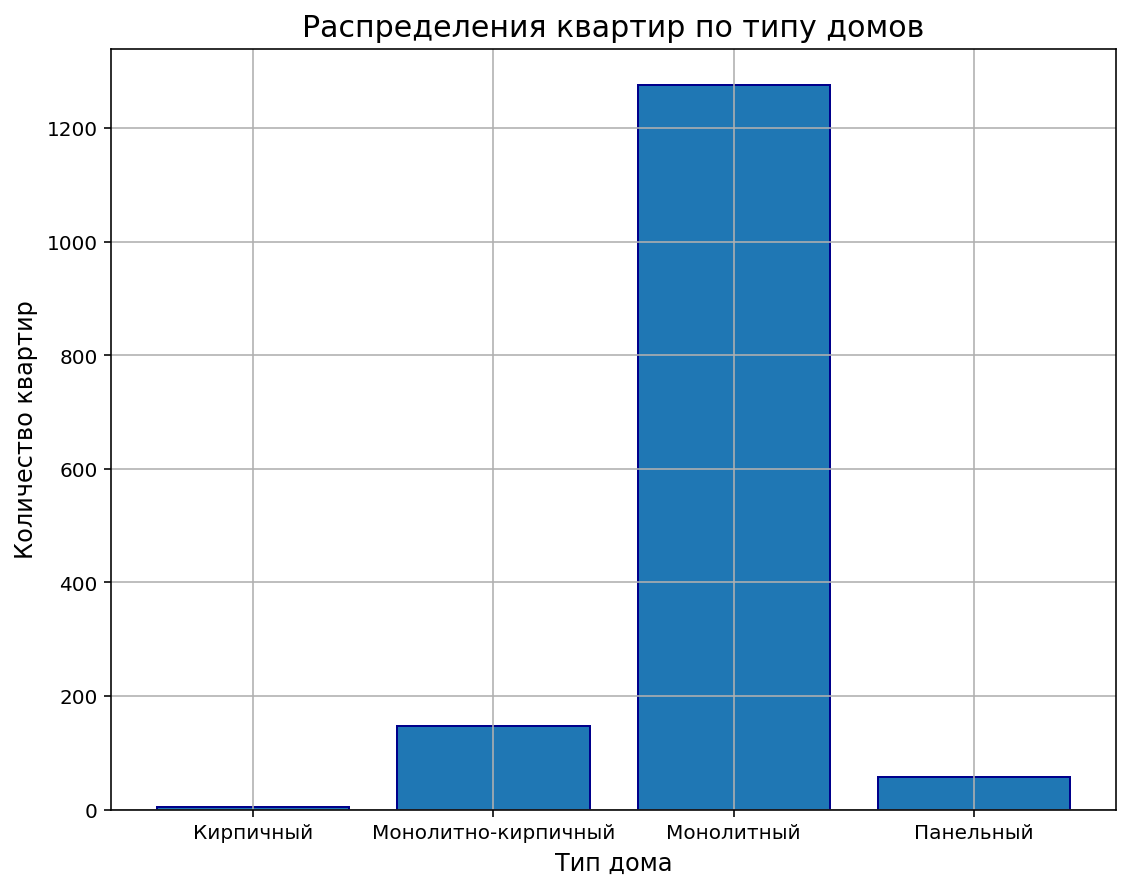

In [125]:
station_counts = df.groupby('type of house')['id'].count()

plt.figure(figsize = (9, 7))
plt.title('Распределения квартир по типу домов', fontsize=15)
plt.bar(station_counts.index, station_counts.values, edgecolor='darkblue')
plt.xlabel('Тип дома', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid()
plt.show()

Подавляющая часть домов монолитные, так как монолитные дома наиболее долговечны и могут стоять 100–150 лет(по мнению экспертов), подобная конструкция не пропускает влагу и ветер, а также устойчива к землетрясениям.

